In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/order.csv')
data.head()

,order_id,date,time,product_id,quantity,class_no
0,44651288,2022/3/31,6:55:15,10003,1,A001
1,44651288,2022/3/31,6:55:15,10050,1,A002
2,44651288,2022/3/31,6:55:15,10082,3,A006
3,44651288,2022/3/31,6:55:15,10651,2,G060
4,44651288,2022/3/31,6:55:15,10666,2,G061


In [3]:
data.shape

(4237, 6)

In [4]:
data.dtypes

order_id       int64
date          object
time          object
product_id     int64
quantity       int64
class_no      object
dtype: object

In [5]:
data.describe()

,order_id,product_id,quantity
count,4.237000e+03,4237.000000,4237.000000
mean,4.465114e+07,10402.580835,1.938636
std,1.831252e+04,234.152636,1.126558
min,4.462104e+07,10001.000000,1.000000
25%,4.463436e+07,10228.000000,1.000000
50%,4.465189e+07,10359.000000,2.000000
75%,4.466724e+07,10635.000000,3.000000
max,4.468186e+07,10794.000000,5.000000


In [6]:
data.nunique() ##觀察

order_id      449
date           61
time          449
product_id    737
quantity        5
class_no       62
dtype: int64

In [7]:
data.loc[data['class_no']=='NONE',:].count() ##清理數據

order_id      0
date          0
time          0
product_id    0
quantity      0
class_no      0
dtype: int64

In [ ]:
# df = data.dropna(axis=0)  #刪除空值
# data = df.drop_duplicates(subset=['order_id']) # 刪除重複值

In [8]:
data['product_id'].value_counts().sort_values(ascending=False)

10172    35
10171    29
10250    23
10346    22
10274    21
         ..
10474     1
10286     1
10061     1
10214     1
10265     1
Name: product_id, Length: 737, dtype: int64

In [ ]:
# data.plot(x='date', y= "quantity") 範例

Text(0.5, 1.0, 'Best sellers')

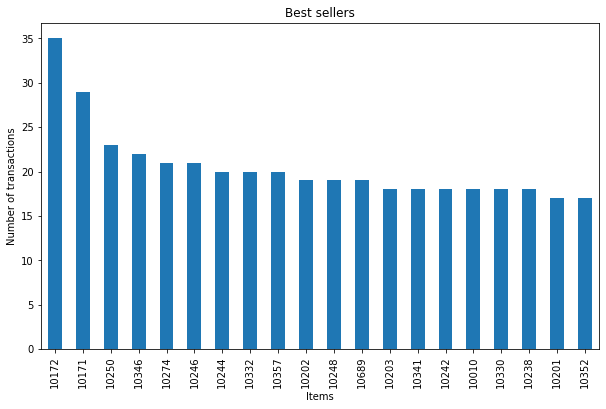

In [10]:
fig, ax=plt.subplots(figsize=(10,6))
data['product_id'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

Text(0.5, 1.0, 'Best sellers')

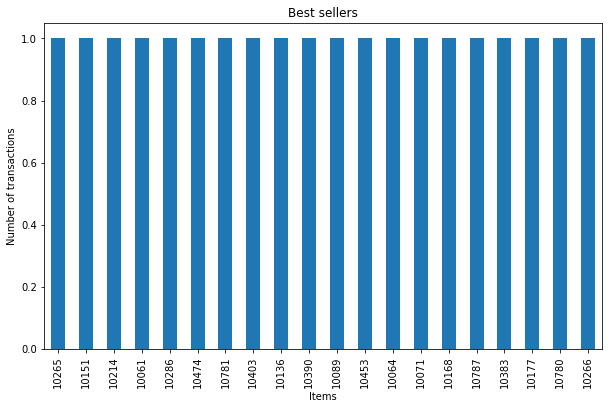

In [11]:
fig, ax=plt.subplots(figsize=(10,6))
data['product_id'].value_counts().sort_values(ascending=True).head(20).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

In [12]:
data["time"] = pd.to_datetime(data['time'],format='%H:%M:%S')
time = []
for i in data["time"]:
  ac = str(i)
  time1 = ac.replace(" ", ",")
  a = time1.split(",")
  b = str(a)
  time.append(a[1])
  

data["time"] = time
# data["time"]

In [13]:
data.loc[(data['time']>='02:00:00')&(data['time']<'06:00:00'),'Daytime']='Early morning'
data.loc[(data['time']>='06:00:00')&(data['time']<'10:00:00'),'Daytime']='Morning'
data.loc[(data['time']>='10:00:00')&(data['time']<'14:00:00'),'Daytime']='Noon'
data.loc[(data['time']>='14:00:00')&(data['time']<'18:00:00'),'Daytime']='Afternoon'
data.loc[(data['time']>='18:00:00')&(data['time']<'22:00:00'),'Daytime']='Evening'
data.loc[(data['time']>='22:00:00')&(data['time']<'02:00:00'),'Daytime']='Midnight'
data.head()

,order_id,date,time,product_id,quantity,class_no,Daytime
0,44651288,2022/3/31,06:55:15,10003,1,A001,Morning
1,44651288,2022/3/31,06:55:15,10050,1,A002,Morning
2,44651288,2022/3/31,06:55:15,10082,3,A006,Morning
3,44651288,2022/3/31,06:55:15,10651,2,G060,Morning
4,44651288,2022/3/31,06:55:15,10666,2,G061,Morning


In [14]:
data.Daytime.isna().count

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
4232    False
4233    False
4234    False
4235    False
4236    False
Name: Daytime, Length: 4237, dtype: bool>

Text(0.5, 1.0, 'Business during the day')

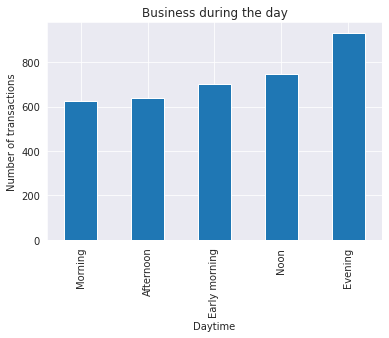

In [17]:
fig, ax=plt.subplots(figsize=(6,4))
sns.set_style('darkgrid')
data.groupby('Daytime')['product_id'].count().sort_values().plot(kind='bar')
plt.ylabel('Number of transactions')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Business during the day')

In [16]:
data['Date_Time']=pd.to_datetime(data['date']+' '+data['time'])
data['Day']=data['Date_Time'].dt.day_name()
data['Month']=data['Date_Time'].dt.month
data['Month_name']=data['Date_Time'].dt.month_name()
data['Year']=data['Date_Time'].dt.year
data['Year_Month']=data['Year'].apply(str)+' '+data['Month_name'].apply(str)
data.drop(['date','time'], axis=1, inplace=True)

data.index=data['Date_Time']
data.index.name='Date'
data.drop(['Date_Time'],axis=1,inplace=True)
data.head()

,order_id,product_id,quantity,class_no,Daytime,Day,Month,Month_name,Year,Year_Month
Date,,,,,,,,,,
2022-03-31 06:55:15,44651288,10003,1,A001,Morning,Thursday,3,March,2022,2022 March
2022-03-31 06:55:15,44651288,10050,1,A002,Morning,Thursday,3,March,2022,2022 March
2022-03-31 06:55:15,44651288,10082,3,A006,Morning,Thursday,3,March,2022,2022 March
2022-03-31 06:55:15,44651288,10651,2,G060,Morning,Thursday,3,March,2022,2022 March
2022-03-31 06:55:15,44651288,10666,2,G061,Morning,Thursday,3,March,2022,2022 March


In [ ]:
# data.groupby('Year_Month')['class_no'].count().plot(kind='bar')
# plt.ylabel('Number of transactions')
# plt.title('Business during the past months')

In [21]:
data2=data.pivot_table(index='Month_name',columns='class_no', aggfunc={'class_no':'count'}).fillna(0)
data2['Max']=data2.idxmax(axis=1)
data2

class_no                                               ...       \
class_no       A001 A002 A003 A004 A005 A006 B007 B008 B009 B010  ... G054   
Month_name                                                        ...        
April            90   72   15   69   27   26   31   25   27   40  ...   20   
March            98   68   16   53   32   46   38   22   23   42  ...   17   

                                                                 Max  
class_no   G055 G056 G057 G058 G059 G060 G061 G062                    
Month_name                                                            
April        18    1   15   35   22   20   33   37  (class_no, A001)  
March        23   10   19   38   26   27   45   45  (class_no, A001)  

[2 rows x 63 columns]

In [20]:
data3=data.pivot_table(index='Daytime',columns='product_id', aggfunc={'product_id':'count'}).fillna(0)
data3['Max']=data3.idxmax(axis=1)
data3

product_id                                                  \
product_id         10001 10002 10003 10004 10005 10006 10007 10008 10009   
Daytime                                                                    
Afternoon            2.0   2.0   0.0   0.0   2.0   0.0   4.0   6.0   3.0   
Early morning        0.0   1.0   5.0   1.0   1.0   2.0   3.0   4.0   4.0   
Evening              3.0   2.0   4.0   1.0   1.0   6.0   2.0   3.0   2.0   
Morning              1.0   1.0   3.0   2.0   0.0   1.0   0.0   3.0   2.0   
Noon                 3.0   3.0   2.0   1.0   1.0   3.0   3.0   1.0   3.0   

                     ...                                                  \
product_id    10010  ... 10780 10781 10782 10783 10784 10787 10788 10792   
Daytime              ...                                                   
Afternoon       2.0  ...   1.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
Early morning   3.0  ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
Evening         4.0  ...   0.0   0.0   1.0   0.0   1.0   0.0   1.0   0.0   
Morning         3.0  ...   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
Noon            2.0  ...   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   

                                     Max  
product_id    10794                       
Daytime                                   
Afternoon       0.0  (product_id, 10008)  
Early morning   0.0  (product_id, 10346)  
Evening         0.0  (product_id, 10171)  
Morning         1.0  (product_id, 10172)  
Noon            0.0  (product_id, 10172)  

[5 rows x 718 columns]

In [22]:
data4=data.pivot_table(index='Day',columns='class_no', aggfunc={'class_no':'count'}).fillna(0)
data4['Max']=data4.idxmax(axis=1)
data4

class_no                                                     ...  \
class_no      A001  A002 A003  A004  A005  A006  B007 B008 B009  B010  ...   
Day                                                                    ...   
Friday        30.0  22.0  4.0  12.0   9.0   7.0  11.0  8.0  6.0  13.0  ...   
Monday        21.0  17.0  6.0  12.0   8.0   9.0   9.0  7.0  7.0  13.0  ...   
Saturday      31.0  26.0  9.0  21.0  11.0  14.0   7.0  6.0  9.0  13.0  ...   
Sunday        17.0  13.0  2.0  11.0   7.0   5.0   5.0  6.0  6.0   7.0  ...   
Thursday      26.0  17.0  6.0  18.0   7.0  13.0  13.0  9.0  6.0  11.0  ...   
Tuesday       36.0  29.0  3.0  24.0  13.0  10.0  12.0  9.0  7.0  17.0  ...   
Wednesday     27.0  16.0  1.0  24.0   4.0  14.0  12.0  2.0  9.0   8.0  ...   

                                                                          Max  
class_no  G054 G055 G056 G057  G058  G059  G060  G061  G062                    
Day                                                                            
Friday     8.0  6.0  3.0  3.0   9.0   9.0   4.0   8.0   8.0  (class_no, A001)  
Monday     5.0  8.0  2.0  5.0  12.0   5.0   9.0  16.0  13.0  (class_no, E034)  
Saturday   5.0  5.0  1.0  8.0  11.0   9.0   5.0  12.0  12.0  (class_no, A001)  
Sunday     2.0  2.0  0.0  3.0   5.0   3.0   4.0   5.0   5.0  (class_no, E039)  
Thursday   6.0  7.0  2.0  3.0  10.0   6.0   9.0  13.0  14.0  (class_no, A001)  
Tuesday    9.0  7.0  3.0  6.0  13.0  12.0  10.0  12.0  15.0  (class_no, A001)  
Wednesday  2.0  6.0  0.0  6.0  13.0   4.0   6.0  12.0  15.0  (class_no, A001)  

[7 rows x 63 columns]

Text(0.5, 1.0, 'Weekly business during the past months')

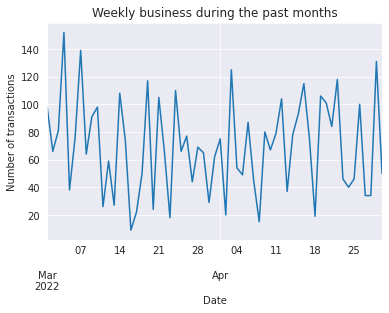

In [23]:
data['product_id'].resample('D').count().plot()  ## D=天 每天的交易量
plt.ylabel('Number of transactions')
plt.title('Weekly business during the past months')

In [24]:
data['product_id'].resample('D').count().max()

152

In [25]:
dPath = pd.read_csv('/content/order.csv')

In [26]:
dPath = dPath.drop_duplicates(subset=['order_id','date','time'],keep='first')
# dPath['order_id'] = dPath['order_id'].drop_duplicates(['order_id','date','time'],keep='first')
dPath = dPath[['order_id','date','time']]
dPath

,order_id,date,time
0,44651288,2022/3/31,6:55:15
6,44665692,2022/4/14,16:37:41
7,44626431,2022/3/6,10:20:55
9,44626977,2022/3/6,23:27:55
13,44660473,2022/4/9,11:21:28
...,...,...,...
4202,44652858,2022/4/1,20:35:33
4214,44625166,2022/3/5,3:59:18
4218,44659669,2022/4/8,16:03:44
4222,44663449,2022/4/12,10:47:40


In [28]:
total_product = []
one_data = []
one_data.append(data["product_id"][0])

for i in range(1, len(data["product_id"])):
    if data["order_id"][i] != data["order_id"][i-1]:
        total_product.append(one_data)
        one_data = []
        one_data.append(data["product_id"][i])
    elif data["order_id"][i] == data["order_id"][i-1]:
        one_data.append(data["product_id"][i])
total_product.append(one_data)
total_product

[[10003, 10050, 10082, 10651, 10666, 10674],
 [10416],
 [10009, 10022],
 [10689, 10706, 10709, 10759],
 [10027, 10559, 10761, 10241, 10346, 10361],
 [10007, 10060, 10108, 10539, 10558, 10582, 10632],
 [10001, 10037, 10016, 10508, 10502, 10579, 10600, 10663],
 [10705,
  10712,
  10721,
  10765,
  10387,
  10422,
  10328,
  10332,
  10141,
  10191,
  10172,
  10175,
  10226,
  10199,
  10200,
  10203],
 [10009,
  10067,
  10107,
  10545,
  10484,
  10517,
  10532,
  10500,
  10558,
  10575,
  10385,
  10430,
  10432],
 [10015, 10058, 10076, 10694, 10693, 10240, 10246],
 [10012, 10016, 10107, 10689, 10729, 10740, 10394, 10443],
 [10013,
  10077,
  10602,
  10656,
  10662,
  10677,
  10239,
  10244,
  10259,
  10282,
  10329,
  10346,
  10352],
 [10442, 10129, 10180, 10226],
 [10010, 10058, 10688, 10741, 10754, 10302, 10330, 10188, 10229, 10201],
 [10507, 10277, 10368],
 [10046, 10554],
 [10757, 10694, 10194, 10201, 10201],
 [10692, 10753, 10772],
 [10015, 10106, 10692, 10777],
 [10046, 10

In [29]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(total_product).transform(total_product)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)


df

,10001,10002,10003,10004,10005,10006,10007,10008,10009,10010,...,10780,10781,10782,10783,10784,10785,10787,10788,10792,10794
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
freq_items = apriori(df, min_support=0.01, use_colnames=True) # $$
freq_items.sort_values("support", ascending = False) ##排序

,support,itemsets
48,0.077951,(10172)
47,0.062361,(10171)
89,0.051225,(10250)
140,0.048998,(10346)
85,0.046771,(10246)
...,...,...
64,0.011136,(10211)
65,0.011136,(10218)
198,0.011136,(10516)
67,0.011136,(10225)


In [ ]:
# freq_items["antecedents"] = freq_items["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")  ## 在後半段輸出成CSV檔會變成其他型態 在這邊轉字串
# freq_items["consequents"] = freq_items["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
# freq_items = pd.DataFrame(freq_items)  ## 會新建一個CSV檔 另存新檔完註解要打開
# freq_items.to_csv("freq_items.csv", encoding="utf-8")    ##CSV檔案名 另存新檔完註解要打開 資料會在左側 /content 裡面
# freq_items = pd.read_csv("/content/drive/MyDrive/物流AIOT/freq_items.csv")


In [37]:
rules = association_rules(freq_items, metric="support", min_threshold=0.01)
rules.sort_values("lift", ascending=False).head(30)
df_ar = rules 
rules 
# df_ar["antecedents"] = df_ar["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")  ## 在後半段輸出成CSV檔會變成其他型態 在這邊轉字串
# df_ar["consequents"] = df_ar["consequents"].apply(lambda x: list(x)[0]).astype("unicode")


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10201),(10171),0.035635,0.062361,0.015590,0.437500,7.015625,0.013368,1.666914
1,(10171),(10201),0.062361,0.035635,0.015590,0.250000,7.015625,0.013368,1.285820
2,(10203),(10171),0.035635,0.062361,0.020045,0.562500,9.020089,0.017822,2.143175
3,(10171),(10203),0.062361,0.035635,0.020045,0.321429,9.020089,0.017822,1.421170
4,(10171),(10204),0.062361,0.028953,0.011136,0.178571,6.167582,0.009330,1.182144
5,(10204),(10171),0.028953,0.062361,0.011136,0.384615,6.167582,0.009330,1.523664
6,(10171),(10205),0.062361,0.013363,0.011136,0.178571,13.363095,0.010303,1.201123
7,(10205),(10171),0.013363,0.062361,0.011136,0.833333,13.363095,0.010303,5.625835
8,(10691),(10171),0.031180,0.062361,0.011136,0.357143,5.727041,0.009191,1.458550
9,(10171),(10691),0.062361,0.031180,0.011136,0.178571,5.727041,0.009191,1.179433


In [ ]:
# df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.7)  ##  $$
# # df_ar["antecedents"] = df_ar["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")  ## 在後半段輸出成CSV檔會變成其他型態 在這邊轉字串
# # df_ar["consequents"] = df_ar["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
# # df_ar = df_ar[['antecedents', 'consequents', 'support', 'confidence']]
# # df_ar = pd.DataFrame(df_ar)
# df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A002),(A001),0.311804,0.418708,0.247216,0.792857,1.893579,0.116661,2.806236
1,(A003),(A001),0.069042,0.418708,0.048998,0.709677,1.694921,0.020089,2.002227
2,(A004),(A001),0.271715,0.418708,0.195991,0.721311,1.722707,0.082222,2.085812
3,(A005),(A001),0.131403,0.418708,0.109131,0.830508,1.983502,0.054112,3.429621
4,(B013),(A001),0.106904,0.418708,0.080178,0.750000,1.791223,0.035416,2.325167
...,...,...,...,...,...,...,...,...,...
4596427,"(D033, E034, E043, D032)","(E037, E036, D027, D025, E042, D026, D030, E038)",0.026726,0.022272,0.020045,0.750000,33.675000,0.019449,3.910913
4596428,"(D033, D027, E042, E034)","(E037, E036, E043, D025, D032, D026, D030, E038)",0.026726,0.024499,0.020045,0.750000,30.613636,0.019390,3.902004
4596429,"(D033, E042, E034, D032)","(E037, E036, E043, D027, D025, D026, D030, E038)",0.026726,0.022272,0.020045,0.750000,33.675000,0.019449,3.910913
4596430,"(E037, E043, D032, D026)","(D033, E036, E038, D027, D025, E042, D030, E034)",0.026726,0.020045,0.020045,0.750000,37.416667,0.019509,3.919822


In [36]:
# df_ar = df_ar[(df_ar.support > 0.1) & (df_ar.confidence > 0.1)]
# df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [47]:
df_Hi = []

s = round(df_ar["support"], 3)
c = round(df_ar["confidence"], 3)
df_ar["support"] = s
df_ar["confidence"] = c
for i in c:
  if i < 0.2:
    df_Hi.append(str('C'))
  elif i < 0.4:
    df_Hi.append(str('B'))
  else:
    df_Hi.append(str('A'))

df_ar["Good"] = df_Hi
df_ar


# df_ar = pd.DataFrame(df_ar.antecedents)  ## 會新建一個CSV檔 另存新檔完註解要打開
# df_ar.to_csv("推薦.csv", encoding="utf-8")    ##CSV檔案名 另存新檔完註解要打開 資料會在左側 /content 裡面

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Good
0,(10201),(10171),0.035635,0.062361,0.016,0.438,7.015625,0.013368,1.666914,A
1,(10171),(10201),0.062361,0.035635,0.016,0.250,7.015625,0.013368,1.285820,B
2,(10203),(10171),0.035635,0.062361,0.020,0.563,9.020089,0.017822,2.143175,A
3,(10171),(10203),0.062361,0.035635,0.020,0.321,9.020089,0.017822,1.421170,B
4,(10171),(10204),0.062361,0.028953,0.011,0.179,6.167582,0.009330,1.182144,C
5,(10204),(10171),0.028953,0.062361,0.011,0.385,6.167582,0.009330,1.523664,B
6,(10171),(10205),0.062361,0.013363,0.011,0.179,13.363095,0.010303,1.201123,C
7,(10205),(10171),0.013363,0.062361,0.011,0.833,13.363095,0.010303,5.625835,A
8,(10691),(10171),0.031180,0.062361,0.011,0.357,5.727041,0.009191,1.458550,B
9,(10171),(10691),0.062361,0.031180,0.011,0.179,5.727041,0.009191,1.179433,C


In [53]:
p = pd.read_csv('/content/product.csv')
a = pd.read_csv('/content/order.csv')
c = pd.read_csv('/content/catlog.csv')

In [62]:
popular_products = pd.DataFrame(a.groupby('product_id')['quantity'].count())
popular_products
most_popular = popular_products.sort_values('quantity', ascending=False)
popular = most_popular.index[(most_popular['quantity'] > 18)].tolist()
popular

[10172,
 10171,
 10250,
 10346,
 10274,
 10246,
 10244,
 10357,
 10332,
 10202,
 10248,
 10689]

In [75]:
def check_id(dataframe, class_no):
    product_name = dataframe[dataframe["product_id"] == class_no][["product"]].values[0]
    print(product_name)

def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [72]:
arl = arl_recommender(df_ar, "10238", 1)
arl

[]

In [76]:
check_id(p, 10238)

['高露潔 全效牙膏6入超值組']


In [79]:
import random  #沒有相關推薦 則推薦熱效排行前10個做推薦

if arl != []:
  print(arl)
else:
  ac= random.sample(popular, 3) 
  print(ac)

[10248, 10202, 10357]


In [81]:
check_id(p, 10238)

['高露潔 全效牙膏6入超值組']
